# Data Ingestion

In [2]:
#! pip install opendatasets

In [3]:
#import opendatasets as od

In [4]:
# od.download("https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set")

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [6]:
api.dataset_download_file("elikplim/concrete-compressive-strength-data-set","concrete_data.csv")

False

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r"D:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\notebook\concrete_data.csv")

In [9]:
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [10]:
df.shape

(1030, 9)

Inference/Assumption: No splitting to train and test since datapoints are very less. Will do StratifiedKFold evaluation at the end.

# Data Validation 10/10/2020

In [11]:
import os

In [12]:
os.getcwd()

'd:\\Ineuron\\Projects\\ConcreteCompressiveStrengthPrediction\\Code\\ConcreteCompressiveStrengthPrediction\\notebook'

In [13]:
os.chdir(r'D:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction')

In [14]:
from concrete_src.config.configuartion import Configuration
from concrete_src.util.util import *


In [15]:
config = Configuration()


In [16]:
validation_config = config.get_data_validation_config()
schema_file_path = validation_config.schema_file_path

In [17]:
schema_info = read_yaml_file(file_path = schema_file_path)
schema_info

{'columns': {'cement': 'float',
  'blast_furnace_slag': 'float',
  'fly_ash': 'float',
  'water': 'float',
  'superplasticizer': 'float',
  'coarse_aggregate': 'float',
  'fine_aggregate': 'float',
  'age': 'int64',
  'concrete_compressive_strength': 'float'},
 'target_column': 'concrete_compressive_strength'}

In [18]:
columns = schema_info['columns']
columns

{'cement': 'float',
 'blast_furnace_slag': 'float',
 'fly_ash': 'float',
 'water': 'float',
 'superplasticizer': 'float',
 'coarse_aggregate': 'float',
 'fine_aggregate': 'float',
 'age': 'int64',
 'concrete_compressive_strength': 'float'}

In [19]:
len(columns)

9

In [20]:
df.shape[1]

9

In [21]:
schema_columns = list(columns.keys())
schema_columns

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'concrete_compressive_strength']

In [22]:
dataframe_columns = list(df.columns)
dataframe_columns

['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate ',
 'age',
 'concrete_compressive_strength']

In [23]:
schema_columns == dataframe_columns

False

In [24]:
list(zip(dataframe_columns, schema_columns))

[('cement', 'cement'),
 ('blast_furnace_slag', 'blast_furnace_slag'),
 ('fly_ash', 'fly_ash'),
 ('water', 'water'),
 ('superplasticizer', 'superplasticizer'),
 ('coarse_aggregate', 'coarse_aggregate'),
 ('fine_aggregate ', 'fine_aggregate'),
 ('age', 'age'),
 ('concrete_compressive_strength', 'concrete_compressive_strength')]

In [25]:
import numpy as np
for i,j in zip(dataframe_columns, schema_columns):
    if str.strip(i)==str.strip(j):
        print(np.issubdtype(df[i].dtype, np.dtype(columns[j])))

True
True
True
True
True
True
True
True
True


In [26]:
columns

{'cement': 'float',
 'blast_furnace_slag': 'float',
 'fly_ash': 'float',
 'water': 'float',
 'superplasticizer': 'float',
 'coarse_aggregate': 'float',
 'fine_aggregate': 'float',
 'age': 'int64',
 'concrete_compressive_strength': 'float'}

# Data Transformation 17/10/2022

In [27]:
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [28]:
df.shape

(1030, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Inference
1. No categorical data
2. No missing data; still will handle missing data with mean imputation

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


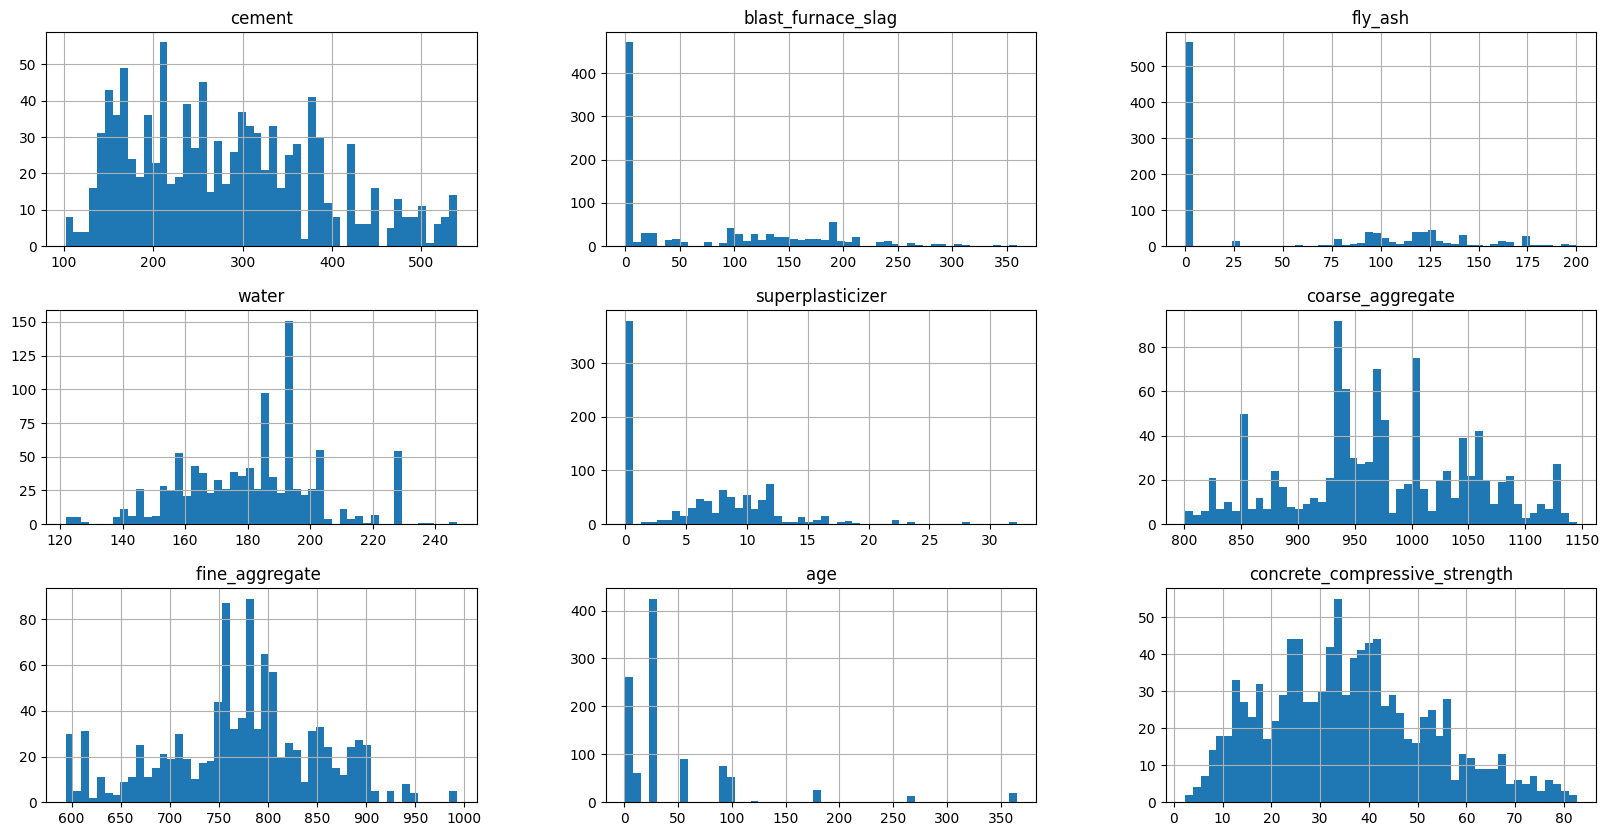

In [31]:
df.hist(bins=50,figsize=(20,10))
plt.show()

d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seab

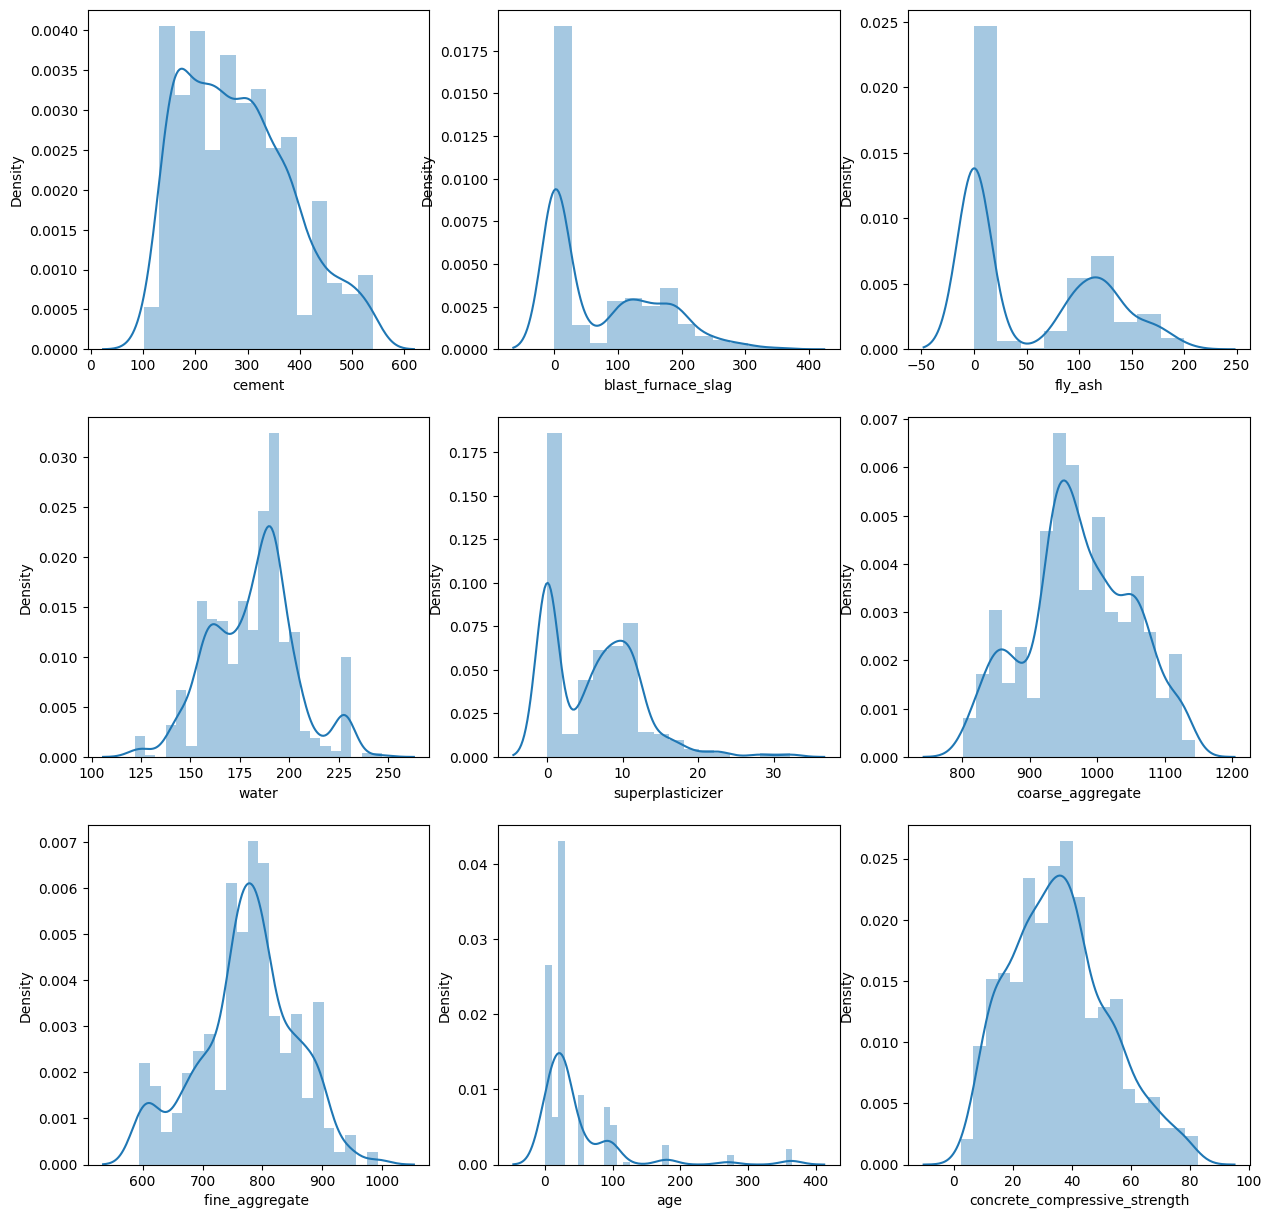

In [32]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Inference:
* Cement & Strength has normal distribution
* Age has a long tail confirming outlier
* Slag, ash, superplasticizer has 2 gaussians and is skewed
* water fine aggregate, coarse aggregate has nearly normal distribution

In [33]:
X = df.drop(["concrete_compressive_strength"], axis=1)
X.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [34]:
y = df.concrete_compressive_strength
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable 

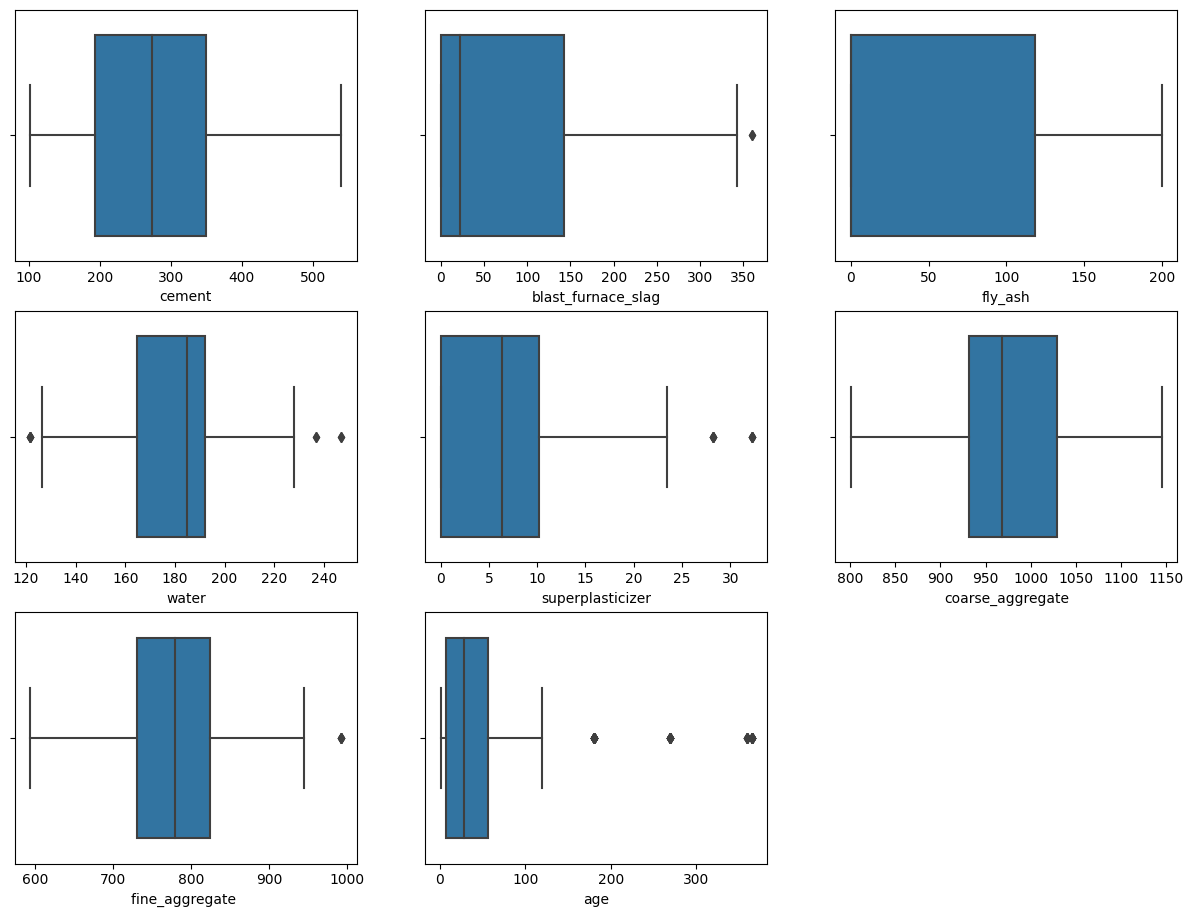

In [35]:
# Checking for outliers

plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Inference: 
* Age has maximum outliers
* Slag, Water, superplastic, fineagg features have some outliers



In [36]:
from sklearn.ensemble import IsolationForest
outlier_model = IsolationForest(n_estimators=200, contamination=0.1)
outlier_model.fit(df)
outlier_predictions = outlier_model.predict(df)
outliers = df[outlier_predictions == -1]
outliers

d:\Ineuron\Projects\ConcreteCompressiveStrengthPrediction\Code\ConcreteCompressiveStrengthPrediction\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
6      380.0                95.0      0.0  228.0               0.0   
...      ...                 ...      ...    ...               ...   
981    145.4                 0.0    178.9  201.7               7.8   
987    162.0               190.1    148.1  178.8              18.8   
992    143.6                 0.0    174.9  158.4              17.9   
1016   164.2                 0.0    200.1  181.2              12.6   
1019   139.7               163.9    127.7  236.7               5.8   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
2                932.0            594.0  270                          40.27  
3                932.0            594.0  365                          41.05  
4                978.4            825.5  360                          44.30  
6                932.0            594.0  365                          43.70  
...                ...              ...  ...                            ...  
981              824.0            868.7   28                          10.54  
987              838.1            741.4   28                          33.76  
992              942.7            844.5   28                          15.42  
1016             849.3            846.0   28                          15.09  
1019             868.6            655.6   28                          35.23  

[103 rows x 9 columns]

Should try outlier imputation since there are 103 datapoints with outliers

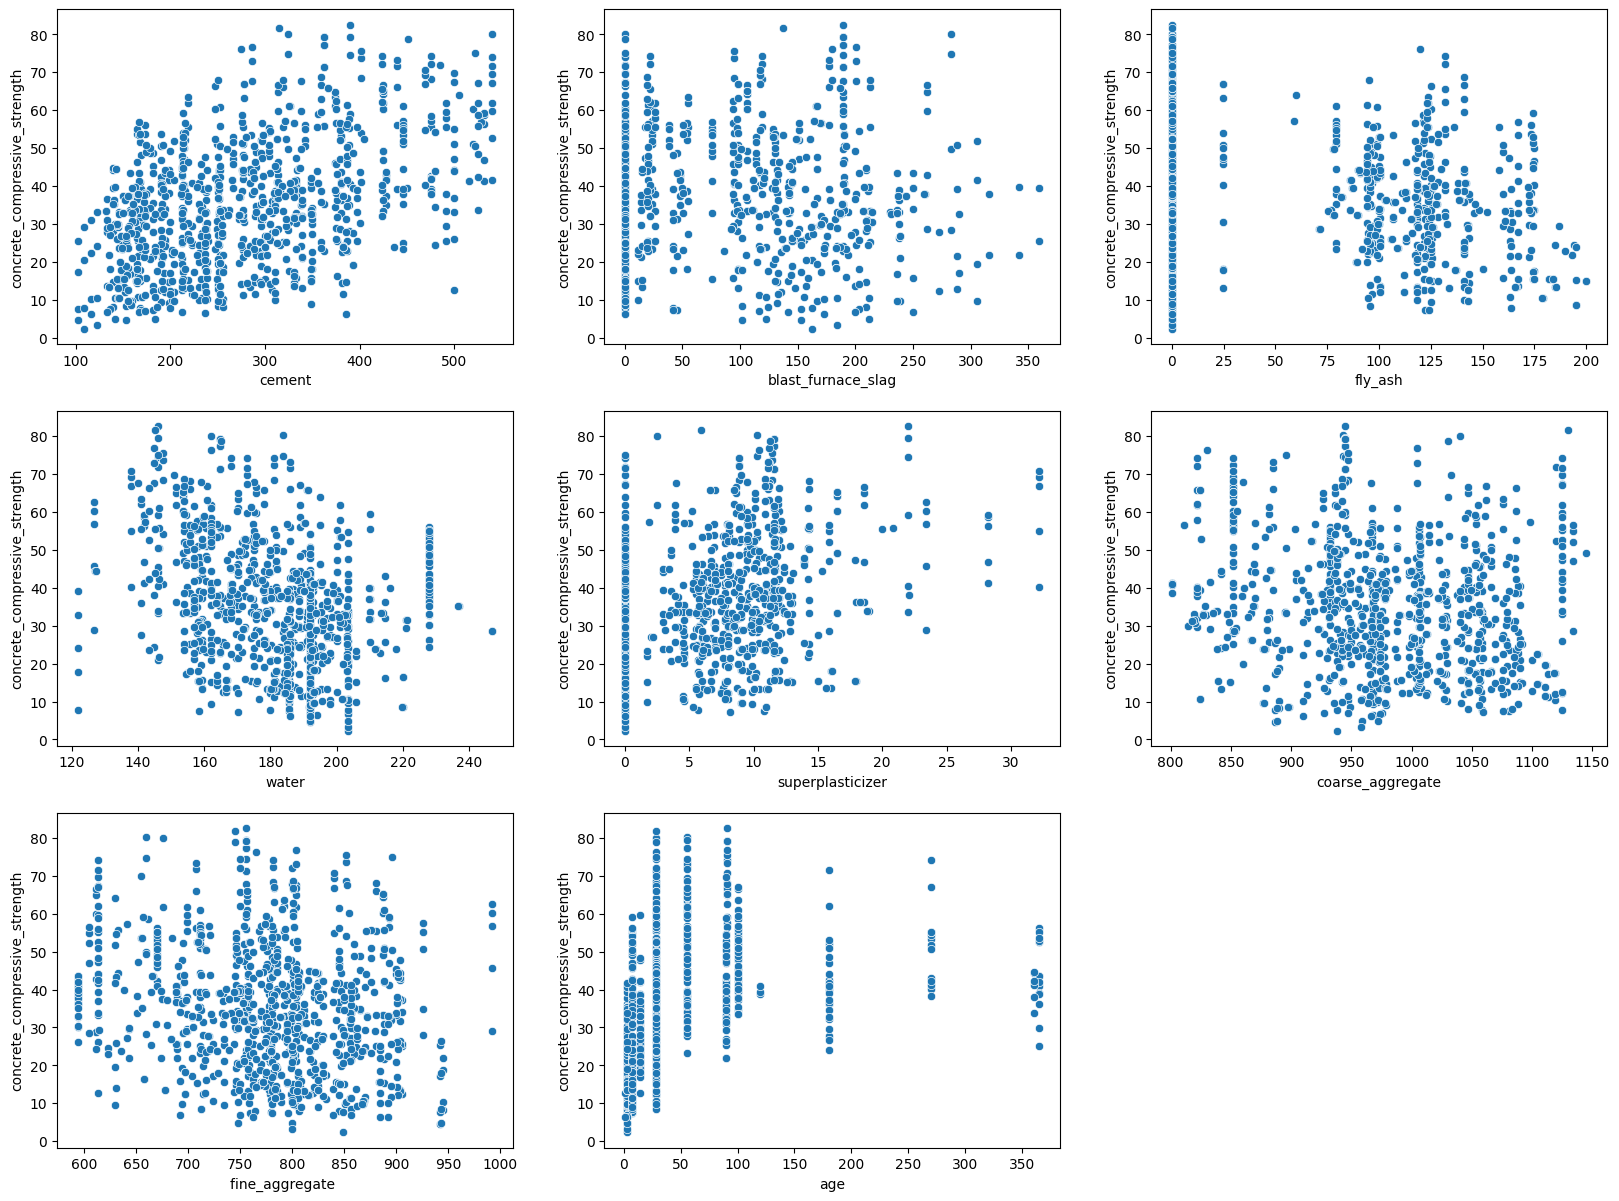

In [37]:
# Features to target column
plt.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x= X[column],y =y)
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Inference: Relationship doesn't look linear

In [38]:
! pip install pandas-profiling

In [39]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Inference
1. Concrete Compressive Strength has high coorelation with cement, water, age, super plasticizer
2. Cement has high coorelation with everything except water.

In [40]:
corr = df.corr()

In [41]:
y_corr = corr["concrete_compressive_strength"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = y_corr.style.background_gradient(cmap=cm)
style

Inference: All features have some correlation with concrete_compressive_strength

Variance Inflation Factor

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["feature"] = df.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

vif_df

feature        VIF
0                         cement  26.232325
1             blast_furnace_slag   4.442518
2                        fly_ash   4.560002
3                          water  92.504056
4               superplasticizer   5.519535
5               coarse_aggregate  85.896630
6                fine_aggregate   73.514995
7                            age   2.434942
8  concrete_compressive_strength  14.557838

Highly multi collinear, feature selection can be considered

In [43]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

In [44]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores.sort_values(by=['Score'], ascending=False, inplace=True)
featureScores

Feature     Score
2             fly_ash  4.256402
4    superplasticizer  3.322633
0              cement  3.264003
5    coarse_aggregate  2.580957
1  blast_furnace_slag  2.343296
3               water  2.233896
6     fine_aggregate   2.183829
7                 age  1.332032

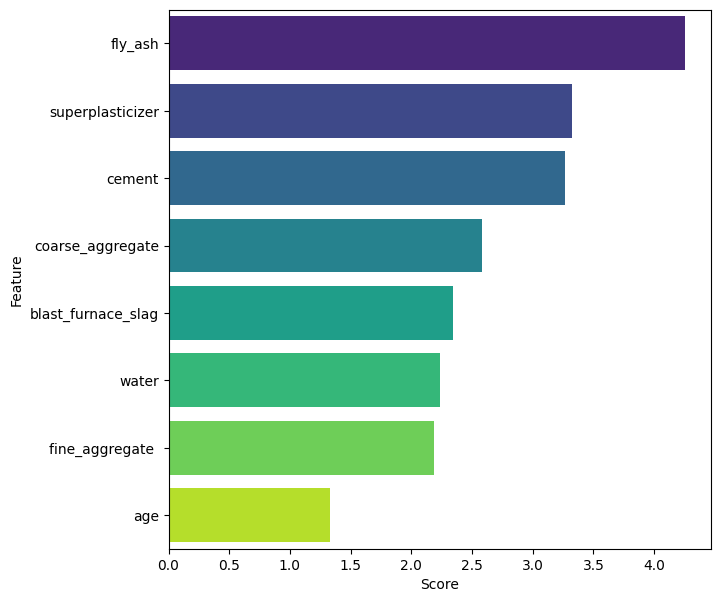

In [45]:
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
plt.show()

Almost all are having same score except age. But age has lot of outlier. Let's handle outlier and then check score once again.

## Feature Engineering

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [47]:
class OutlierImputer(KNNImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    It makes the outlier null and then uses SimpleImputer to fill those values
    '''
    def __init__(self, n_neighbors=3):
        self.n_neighbors = 3
        super().__init__(n_neighbors=n_neighbors)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

simple_data_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=3)),
        ('log transformation', FunctionTransformer(np.log1p)),
        ('std_scaler', StandardScaler()),
    ])

outlier_data_pipeline = Pipeline([
        ('outlier_imputer', OutlierImputer()),
        ('log transformation', FunctionTransformer(np.log1p)),
        ('std_scaler', StandardScaler()),
    ])

In [91]:
X_outlier_handled = pd.DataFrame(outlier_data_pipeline.fit_transform(X), columns= X.columns)

In [73]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X_outlier_handled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_outlier_handled.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
featureScores.sort_values(by=['Score'], ascending=False, inplace=True)
featureScores

Feature     Score
2             fly_ash  3.805317
0              cement  3.550000
7                 age  3.301793
4    superplasticizer  3.107223
5    coarse_aggregate  2.607032
3               water  2.530352
1  blast_furnace_slag  2.433487
6     fine_aggregate   1.973109

Assumption:
After handling outlier, all features are having almost the same score. So feature selection need not be done.

In [92]:
X_simple_transformed = pd.DataFrame(simple_data_pipeline.fit_transform(X), columns= X.columns)
X_simple_transformed

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0     1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
1     1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
2     0.625512            1.004866 -0.900772  2.041020         -1.264982   
3     0.625512            1.004866 -0.900772  2.041020         -1.264982   
4    -0.728181            0.974536 -0.900772  0.540030         -1.264982   
...        ...                 ...       ...       ...               ...   
1025  0.139806            0.920022  1.000765 -0.042750          0.748041   
1026  0.542782           -1.059018  1.103800  0.720059          0.871919   
1027 -1.490351            0.995790  1.077720  0.571803          0.456133   
1028 -1.309704            1.116452 -0.900772 -0.239311          0.938640   
1029 -0.011821            0.860963  0.941408  0.922627          0.721021   

      coarse_aggregate  fine_aggregate        age  
0             0.868136        -1.221795  0.503117  
1             1.046009        -1.221795  0.503117  
2            -0.493688        -2.454726  0.503117  
3            -0.493688        -2.454726  0.503117  
4             0.109753         0.683599  0.503117  
...                ...              ...       ...  
1025         -1.347202        -0.001279  0.503117  
1026         -2.115505         0.542760  0.503117  
1027         -1.032922         0.142862  0.503117  
1028          0.251126         0.251069  0.503117  
1029         -1.427389        -0.086064  0.503117  

[1030 rows x 8 columns]

# Model Training

### Strategy
1. Create model after handling outlier and before
2. Select the best one using KfoldCV.
3. Fine tune it using grid search cv

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [94]:
regressors = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR()
}

In [95]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64

In [115]:
def train_model(X, y):
    k_fold_split = 10
    regressor_train_summary = pd.DataFrame(columns=['model name', 'model', 'model_mean_score'])
    for regressor_name, regressor_object in regressors.items():
        model = regressor_object.fit(X_simple_transformed, y)
        model_scores = cross_val_score(model, X_simple_transformed, y, cv = k_fold_split, n_jobs = 2)
        model_mean_score = model_scores.mean()
        regressor_train_summary = regressor_train_summary.append({
                    'model name': regressor_name,   
                    'model' : model,
                    'model_mean_score': model_mean_score}, ignore_index=True)
    return (regressor_train_summary.sort_values(by=['model_mean_score'], ascending=False))

Model Training without outlier handling

In [116]:
train_model(X_simple_transformed, y)

model name  \
3  GradientBoostingRegressor   
1      RandomForestRegressor   
0           LinearRegression   
2          AdaBoostRegressor   
4        KNeighborsRegressor   
5                        SVR   

                                               model  model_mean_score  
3  ([DecisionTreeRegressor(criterion='friedman_ms...          0.664574  
1  (DecisionTreeRegressor(max_features='auto', ra...          0.658686  
0                                 LinearRegression()          0.571572  
2  (DecisionTreeRegressor(max_depth=3, random_sta...          0.506596  
4                              KNeighborsRegressor()          0.498915  
5                                              SVR()          0.485432

Model training with outlier handling

In [117]:
models = train_model(X_outlier_handled, y)

In [118]:
models

model name  \
3  GradientBoostingRegressor   
1      RandomForestRegressor   
0           LinearRegression   
2          AdaBoostRegressor   
4        KNeighborsRegressor   
5                        SVR   

                                               model  model_mean_score  
3  ([DecisionTreeRegressor(criterion='friedman_ms...          0.666722  
1  (DecisionTreeRegressor(max_features='auto', ra...          0.657159  
0                                 LinearRegression()          0.571572  
2  (DecisionTreeRegressor(max_depth=3, random_sta...          0.523841  
4                              KNeighborsRegressor()          0.498915  
5                                              SVR()          0.485432

## Conclusion:
    Model with outlier handled is showing better performance and GradientBoostingRegressor is the best among the models but result is not satisfactory since linear relationship among features and output is not there. Hence going for clustering.

In [101]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
class Clustering:
    def __init__(self, X):
        self.data = X
        self.number_of_clusters = self.get_no_of_clusters()

    def get_no_of_clusters(self):
        inertias=[] # initializing an empty list
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
            kmeans.fit(self.data) # fitting the data to the KMeans Algorithm
            inertias.append(kmeans.inertia_)
        plt.plot(range(1,11),inertias) # creating the graph between inertias and the number of clusters
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('cluster_nos')
        #plt.show()
        plt.savefig('K-Means_Elbow.PNG') # saving the elbow plot locally
        # finding the value of the optimum cluster programmatically
        self.kn = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')
        return self.kn.knee

    def create_clusters(self):    
        self.kmeans = KMeans(n_clusters=self.number_of_clusters, init='k-means++', random_state=42)
        #self.data = self.data[~self.data.isin([np.nan, np.inf, -np.inf]).any(1)]
        clusters=self.kmeans.fit_predict(self.data) #  divide data into clusters
        self.data['Cluster']=clusters  # create a new column in dataset for storing the cluster information
        return self.data

cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
1  1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
2  0.625512            1.004866 -0.900772  2.041020         -1.264982   
3  0.625512            1.004866 -0.900772  2.041020         -1.264982   
4 -0.728181            0.974536 -0.900772  0.540030         -1.264982   

   coarse_aggregate  fine_aggregate        age  Cluster  
0          0.868136        -1.221795  0.503117        0  
1          1.046009        -1.221795  0.503117        0  
2         -0.493688        -2.454726  0.503117        1  
3         -0.493688        -2.454726  0.503117        1  
4          0.109753         0.683599  0.503117        1

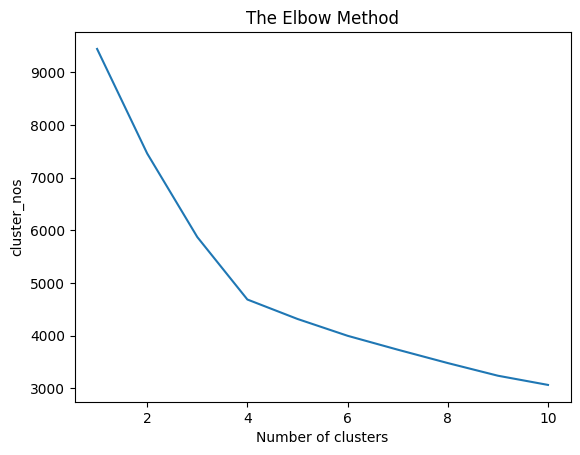

In [105]:
cluster = Clustering(X_outlier_handled)
X_cluster = cluster.create_clusters()
X_cluster.head()

In [107]:
X_cluster.Cluster.value_counts()

3    338
2    247
1    224
0    221
Name: Cluster, dtype: int64

In [104]:
all_clusters = list(X_cluster['Cluster'].unique())
all_clusters

[2, 0, 3, 1]

Looking for best ML algorithm for each clusters

In [149]:
# trial 1
param_grid1 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.05, 0.1], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': [2, 4],
    'n_estimators': [100, 200],
    'subsample': [0.8, 0.9]
}

In [150]:
fine_tune_models = {
    "GradientBoostingRegressor": param_grid1
}

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
def fine_tune(param, estimator):
    GridSearchCV_GBC = GridSearchCV(estimator=estimator, 
                                    param_grid=param, 
                                    cv=3,
                                    verbose=1, 
                                    n_jobs=2,
                                    return_train_score=True
                                    )
    GridSearchCV_GBC.fit(X_outlier_handled, y)
    best_model = GridSearchCV_GBC.best_estimator_    
    scores = cross_val_score(best_model, X_outlier_handled, y, cv = 3, n_jobs = 2, scoring = 'r2')
    return best_model, scores.mean()

In [153]:
def get_best_model_cluster(cluster_no, data):
    cluster_data=data[data['Cluster']==cluster_no] # filter the data for one cluster

    # Prepare the feature and Label columns
    cluster_features=data.drop(['y','Cluster'],axis=1)
    cluster_label= data['y']
    #getting the best model for each of the clusters    
    best_model_name, best_model, best_score = train_model(cluster_features, cluster_label).iloc[0]
    best_model, best_score = fine_tune(fine_tune_models[best_model_name],best_model)
    return best_model_name, best_model, best_score


In [154]:
data = X_outlier_handled
data['y'] = y
data.head()


cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
1  1.901276           -1.059018 -0.900772 -0.942602         -0.164959   
2  0.625512            1.004866 -0.900772  2.041020         -1.264982   
3  0.625512            1.004866 -0.900772  2.041020         -1.264982   
4 -0.728181            0.974536 -0.900772  0.540030         -1.264982   

   coarse_aggregate  fine_aggregate        age  Cluster      y  
0          0.868136        -1.221795  0.503117        0  79.99  
1          1.046009        -1.221795  0.503117        0  61.89  
2         -0.493688        -2.454726  0.503117        1  40.27  
3         -0.493688        -2.454726  0.503117        1  41.05  
4          0.109753         0.683599  0.503117        1  44.30

In [155]:
model_cluster_wise = pd.DataFrame(columns=['cluster','model_name','model','score'])
for cluster in all_clusters:
    best_model_name, best_model, best_score = get_best_model_cluster(cluster, data)
    model_cluster_wise = model_cluster_wise.append(
        {
            'cluster': cluster,
            'model_name': best_model_name,
            'model': best_model,
            'score': best_score
        }, ignore_index=True
    )
model_cluster_wise

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits


cluster                 model_name  \
0       2  GradientBoostingRegressor   
1       0  GradientBoostingRegressor   
2       3  GradientBoostingRegressor   
3       1  GradientBoostingRegressor   

                                               model     score  
0  ([DecisionTreeRegressor(criterion='friedman_ms...  0.999831  
1  ([DecisionTreeRegressor(criterion='friedman_ms...  0.999815  
2  ([DecisionTreeRegressor(criterion='friedman_ms...  0.999816  
3  ([DecisionTreeRegressor(criterion='friedman_ms...  0.999815

# Model Tuning Experiments

In [62]:
# Original
param_grid = {
    'criterion': ['mse', 'mae', 'friedman_mse'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [2, 3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(2, 10)),
    'n_estimators': list(range(50, 500, 50)),
    'subsample': [0.8, 0.9, 1.0]
}

In [135]:
# trial 2
param_grid2 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.1, 0.15], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': [4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

In [136]:
# trial 3
param_grid3 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.09, 0.1, 0.15], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt'], 
    'max_leaf_nodes': [4, 5, 6],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.8, 0.9, 1.0]
}

In [137]:
# trial 4
param_grid4 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.1, 0.15, 0.20], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt'], 
    'max_leaf_nodes': [4, 5, 6, 7],
    'n_estimators': [250, 300, 350],
    'subsample': [0.8, 0.9, 1.0]
}

In [138]:
# trial 5
param_grid5 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.09, 0.1, 0.15], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt'], 
    'max_leaf_nodes': [4, 5, 6],
    'n_estimators': [300, 350, 400],
    'subsample': [0.9, 1.0]
}

In [139]:
# trial 6
param_grid6 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.1, 0.15], 
    'max_depth': [2, 3], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': [4, 5, 6],
    'n_estimators': [300, 350, 400],
    'subsample': [0.9, 1.0]
}

In [141]:
# trial 7
param_grid7 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.1, 0.15], 
    'max_depth': [None, 2], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': [4, 5, 6],
    'n_estimators': [300, 350, 400],
    'subsample': [0.9, 1.0]
}

In [142]:
# trial 8
param_grid8 = {
    'criterion': ['friedman_mse'], 
    'learning_rate': [0.1, 0.15], 
    'max_depth': [None, 2], 
    'max_features': ['sqrt'], 
    'max_leaf_nodes': [3, 4, 5],
    'n_estimators': [350, 400, 450],
    'subsample': [0.9, 1.0]
}

In [144]:
params = [param_grid1, param_grid2, param_grid3, param_grid4, param_grid5, param_grid6, param_grid7, param_grid8]

In [147]:
for index, param in enumerate(params, start = 1):
    print(index)
    print(fine_tune_GBC(param))

1
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Score = 0.9998018093187416
GradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_leaf_nodes=4,
                          n_estimators=200, subsample=0.8)
2
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Score = 0.9996999708567204
GradientBoostingRegressor(max_leaf_nodes=5, n_estimators=300, subsample=0.8)
3
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Score = 0.978360680472926
GradientBoostingRegressor(learning_rate=0.15, max_features='sqrt',
                          max_leaf_nodes=4, n_estimators=300, subsample=0.8)
4
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Score = 0.9560249392565178
GradientBoostingRegressor(learning_rate=0.2, max_depth=2, max_features='sqrt',
                          max_leaf_nodes=7, n_estimators=350, subsample=0.8)
5
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Score = 0.9721055007149384
GradientBoostingRegressor(lea

best_param = param_grid1